In [30]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Dataset se odnosi na papirne novčanice. Cilj je da se koristeći Support Vector Machine (SVM) model odredi da li je novčanica

autentična na osnovu 4 parametra koja opisuju novčanicu.

In [31]:
df = pd.read_csv('data.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [32]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

Pošto ima više podataka koji se klasifikuju kao 0,

uklanjaju se nasumično izabrani podaci tako da bude jednak broj podataka sa obije klase

In [33]:
import random

class_counts = df['class'].value_counts()

min_count = min(class_counts)

indices_to_remove = random.sample(df[df['class'] == 0].index.tolist(), class_counts[0] - min_count)

df = df.drop(indices_to_remove)

df['class'].value_counts()

0    610
1    610
Name: class, dtype: int64

In [34]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1220.00000,1220.000000,1220.000000,1220.000000,1220.000000
mean,0.18752,1.584175,1.506869,-1.192226,0.500000
std,2.83735,5.863554,4.413921,2.104217,0.500205
min,-7.04210,-13.773100,-5.286100,-7.785300,0.000000
25%,-1.95520,-2.125200,-1.431425,-2.393100,0.000000
50%,0.12226,1.933750,0.638485,-0.586000,0.500000
75%,2.55645,6.235800,3.439300,0.383818,1.000000
max,6.82480,12.951600,17.927400,2.449500,1.000000


In [35]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

Svi podaci su numerički

In [36]:
df.isnull().value_counts()

variance  skewness  curtosis  entropy  class
False     False     False     False    False    1220
dtype: int64

Nema null vrijednosti

array([[<Axes: title={'center': 'variance'}>,
        <Axes: title={'center': 'skewness'}>],
       [<Axes: title={'center': 'curtosis'}>,
        <Axes: title={'center': 'entropy'}>],
       [<Axes: title={'center': 'class'}>, <Axes: >]], dtype=object)

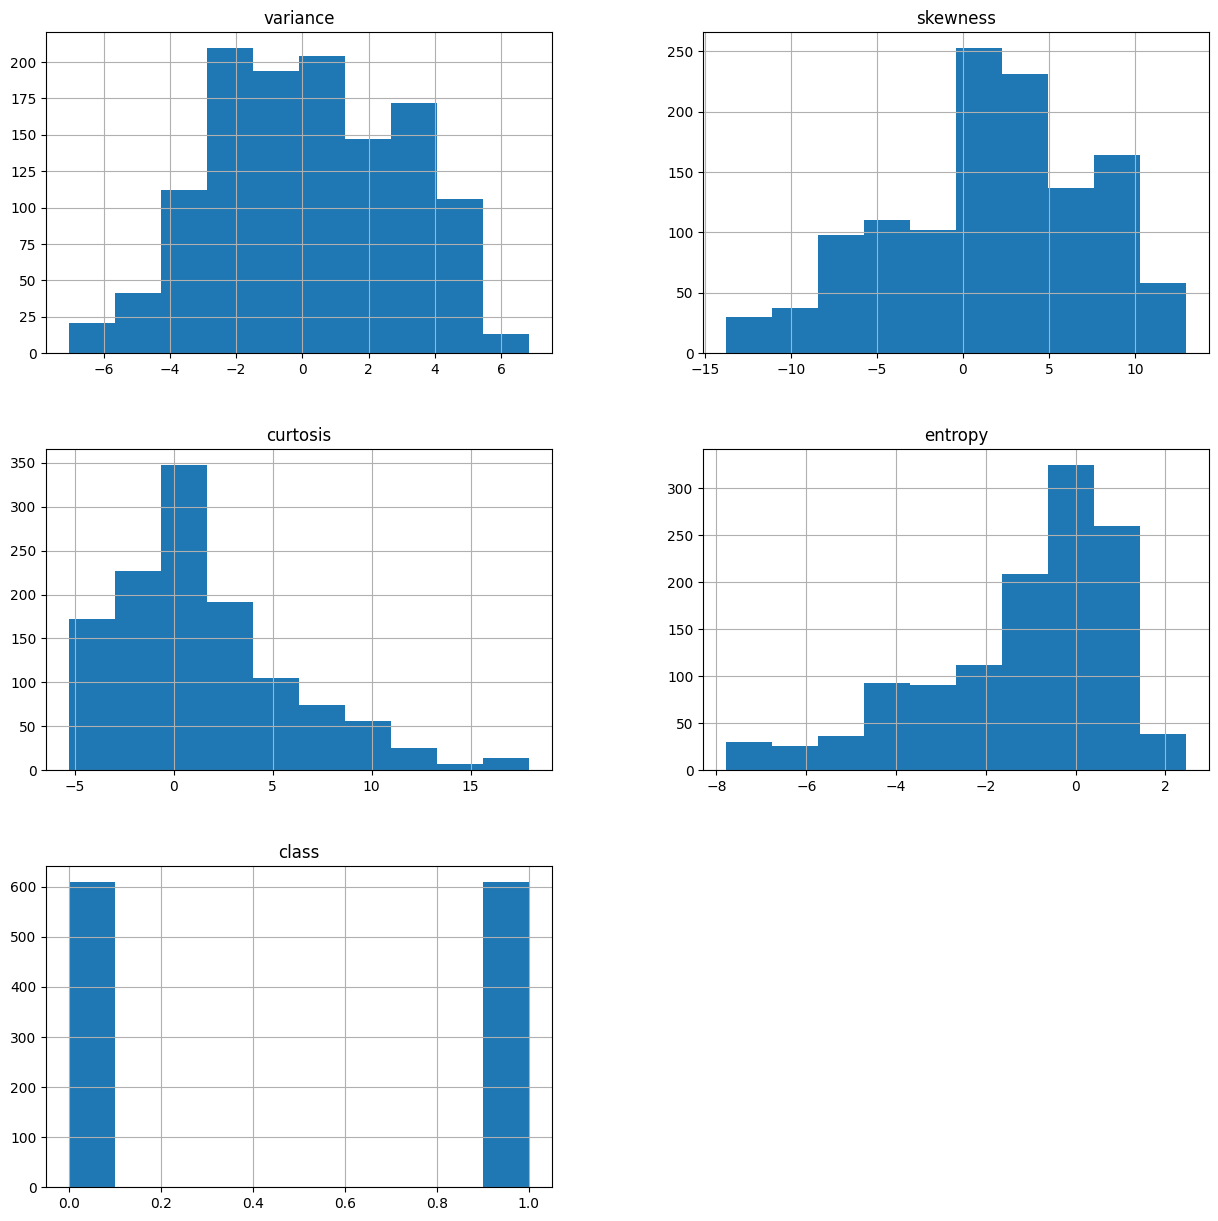

In [37]:
df.hist(figsize=(15,15))

<Axes: >

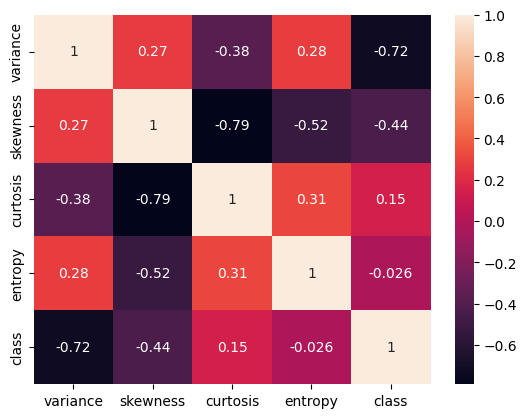

In [38]:
sns.heatmap(df.corr(),annot=True)

Korelacija između svih kolona

In [39]:
df.corrwith(df['class']).abs().sort_values(ascending=False)

class       1.000000
variance    0.724904
skewness    0.439803
curtosis    0.145373
entropy     0.025870
dtype: float64

Korelacija kolone class sa svakom kolonom iz seta podataka

In [40]:
X = df[df.columns.difference(['class'])]
y = df[['class']]

Odvajanje ulaznih podataka i oznake

In [41]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=0,test_size=0.2)

Podjela podataka na trening i testne podatke, gdje je 80% trening, a 20% testni podaci

In [42]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
print(clf.coef_)
print(clf.intercept_)

[[-1.71128555 -0.25180584 -1.43033133 -2.47816129]]
[2.36305881]


Optimalne vrijednosti parametara funkcije

y = θ₀ + θ₁x₁ + θ₂x₂ + θ₃x₃ + θ₄x₄

Kreiranje modela koristeći SVC

In [44]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: " ,metrics.recall_score(y_test, y_pred))
print("F1 score: " ,metrics.f1_score(y_test, y_pred))

Accuracy:  0.9959016393442623
Precision:  0.9923664122137404
Recall:  1.0
F1 score:  0.9961685823754789


In [45]:
metrics.confusion_matrix(y_test,y_pred)

array([[113,   1],
       [  0, 130]])

In [46]:
variance = 3.116
skewness = 8.5661
curtosis = -2.573
entropy = -0.54699

clf.predict([[variance,skewness,curtosis,entropy]])[0]

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0

Predikcija nad podacima koje unese korisnik

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/49/5sz0v3414kd605plh8fjrrqm0000gn/T/ipykernel_13991/1239380531.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='coolwarm')


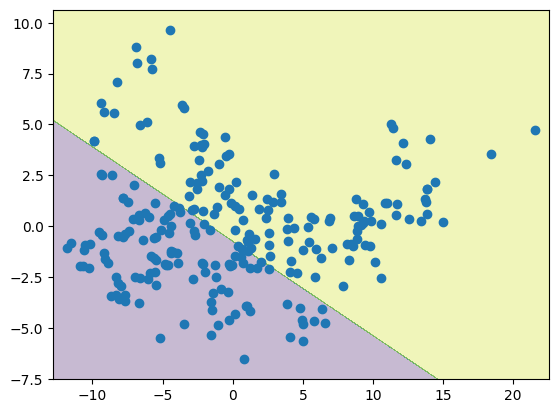

In [47]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

clfPCA = svm.SVC(kernel='linear')
clfPCA.fit(X_pca, y_test)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.01), np.arange(y_min, y_max,0.01))

Z = clfPCA.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='coolwarm')
plt.show()

PCA razlaže ulazne podatke na dva atributa, radi grafičke prezentacije